In [ ]:
# pip install pystan==2.19.1.1
# pip install prophet==1.0

In [4]:
import pandas as pd
#from prophet import Prophet

In [5]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [7]:
m = Prophet()
m.fit(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.967% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 142


  0%|          | 0/136 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.58E-01, min: 2.51E+00


  0%|          | 0/136 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.58E-01, min: 2.15E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.36E-01
Epoch[142/142]: 100%|██████████| 142/142 [00:08<00:00, 16.65it/s, SmoothL1Loss=0.00623, MAE=0.351, RMSE=0.487, Loss=0.00477, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,2.353952,12.777222,13.901041,1.824778,0.0
1,2.063404,11.463254,12.545709,1.591597,0.0
2,1.675363,9.697645,10.771669,1.281473,0.0
3,1.148765,7.257045,8.316034,0.860057,0.0
4,0.552106,4.289094,5.171973,0.390208,0.0
...,...,...,...,...,...
137,0.006284,0.352602,0.488718,0.004818,0.0
138,0.006254,0.352427,0.487948,0.004790,0.0
139,0.006249,0.351778,0.486721,0.004786,0.0
140,0.006238,0.351694,0.487111,0.004778,0.0


In [8]:
future = m.make_future_dataframe(periods=365)
future.tail()

TypeError: make_future_dataframe() missing 1 required positional argument: 'df'

In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

NameError: name 'future' is not defined

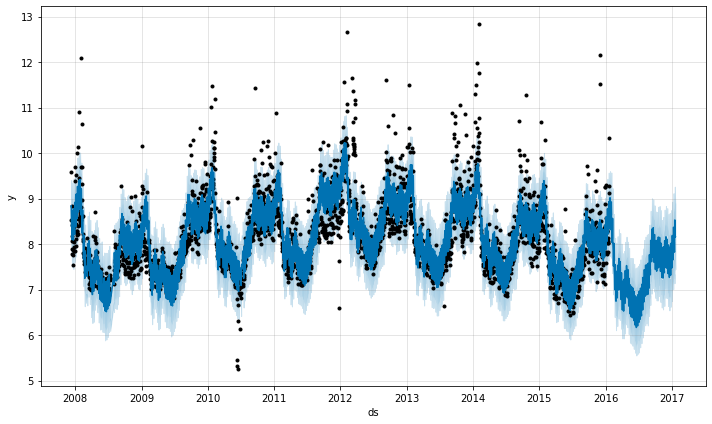

In [6]:
fig1 = m.plot(forecast)

/Users/karl/git/neural_prophet/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/karl/git/neural_prophet/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


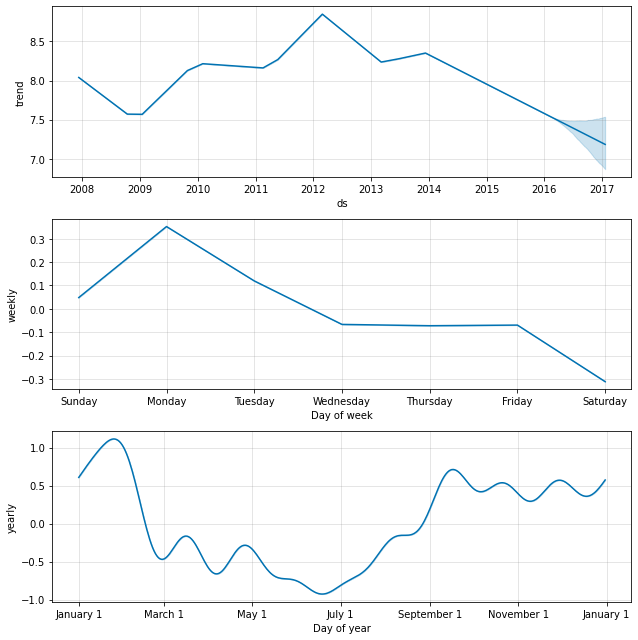

In [7]:
fig2 = m.plot_components(forecast)

In [8]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [9]:
plot_components_plotly(m, forecast)

/Users/karl/git/neural_prophet/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/karl/git/neural_prophet/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [1]:
from neuralprophet.wrapper import Prophet

m = Prophet()

In [2]:
m